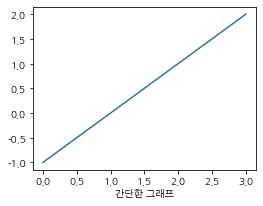

In [1]:
# 사용 예시!
import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.show()

In [2]:
# <그래프 그리기 전용> - 사용할 데이터 프레임 만들기
# 1. 파일 다운로드
# 2. Colab에서 한글 폰트 사용하시 실행
# 3. 아래의 데이터 프레임 만들기 실행
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import koreanize_matplotlib
warnings.filterwarnings('ignore')

df = pd.read_csv('./data_03/bread_data.csv', encoding='cp949', dtype={'건물소유구분명': object, '전통업소지정번호': object})
bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']]
condition1 = bread['소재지전체주소'].str.split().str[0] == '서울특별시'
condition2 = bread['업태구분명'] == '제과점영업'
bread = bread[condition1 & condition2]
bread['구명'] = bread['소재지전체주소'].str.split().str[1]
bread['동명'] = bread['소재지전체주소'].str.split().str[2]
bread['폐업일자'] = bread['폐업일자'].fillna(0.0).astype('int64')
bread = bread.drop(columns=['소재지전체주소', '업태구분명'])
bread = bread.rename(columns={'상세영업상태코드': '상태코드'})
bread['설립년도'] = bread['인허가일자'] // 10000
bread['폐업년도'] = bread['폐업일자'] // 10000
nyear = 2021
bread.loc[bread['상태코드']==1,'영업기간'] = nyear - bread['설립년도'] + 1
bread.loc[bread['상태코드']==2,'영업기간'] = bread['폐업년도'] - bread['설립년도'] + 1
func = lambda x : (nyear - x['설립년도'] + 1) if x['상태코드']==1 else (x['폐업년도'] - x['설립년도'] + 1)
bread['영업기간'] = bread.apply(func, axis=1)
temp1 = bread['설립년도'].value_counts().sort_index().to_frame().T
temp2 = bread['폐업년도'].value_counts().sort_index().to_frame().T
temp = pd.concat([temp1, temp2], axis=0, join='outer')
temp = temp.fillna(0).astype('int64')
temp
# [4-25]로 가서 그래프 실행

FileNotFoundError: [Errno 2] No such file or directory: './data_03/bread_data.csv'

## 제과점 오픈 프로젝트

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 제과점에 대한 파일 './data_03/bread_data.csv'을
# encoding='cp949' 를 사용하여 읽어와 df라는 이름을 붙인다
# low_memory=False 또는 dtype={'건물소유구분명': object, '전통업소지정번호': object}를 사용하여 Warning를 제거할 수 있음
df = pd.read_csv('./data_03/bread_data.csv', encoding='cp949', dtype={'건물소유구분명': object, '전통업소지정번호': object})

In [ ]:
df.dtypes.to_frame().reset_index().head()

,index,0
0,번호,int64
1,개방서비스명,object
2,개방서비스id,object
3,개방자치단체코드,int64
4,관리번호,object


In [ ]:
df.shape

(52680, 48)

In [ ]:
# [4-4] df의 행, 열에 대한 개수, 각 열 별 데이터 개수 및 dtype,
# 메모리 사용량을 확인합니다.
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52680 entries, 0 to 52679
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           52680 non-null  int64  
 1   개방서비스명       52680 non-null  object 
 2   개방서비스id      52680 non-null  object 
 3   개방자치단체코드     52680 non-null  int64  
 4   관리번호         52680 non-null  object 
 5   인허가일자        52680 non-null  int64  
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     52680 non-null  int64  
 8   영업상태명        52680 non-null  object 
 9   상세영업상태코드     52680 non-null  int64  
 10  상세영업상태명      52680 non-null  object 
 11  폐업일자         33669 non-null  float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        31967 non-null  object 
 16  소재지면적        49047 non-null  object 
 17  소재지우편번호      50885 non-null  float64
 18  소재지전체주소      52513 non-null  object 
 19  도로명전

In [ ]:
# df의 '상세영업상태명'에 대해 값별 개수를 구합니다.
df['상세영업상태명'].value_counts()

폐업    33669
영업    19011
Name: 상세영업상태명, dtype: int64

In [ ]:
df['폐업일자'].value_counts(normalize=True, dropna=False)

NaN           0.360877
20030402.0    0.000911
20201228.0    0.000892
20051229.0    0.000816
20060216.0    0.000797
                ...   
20151115.0    0.000019
20030329.0    0.000019
20040514.0    0.000019
20171029.0    0.000019
19970723.0    0.000019
Name: 폐업일자, Length: 5689, dtype: float64

In [ ]:
# df의 '상세영업상태코드'에 대해 값별 개수를 구합니다.
df['상세영업상태코드'].value_counts()   # 1: 영업, 2: 폐업

2    33669
1    19011
Name: 상세영업상태코드, dtype: int64

In [ ]:
# df의 컬럼 중에
# '인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명'만 가져옵니다.

bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']]
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명
0,20130201,1,NaN,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업
1,20130318,1,NaN,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업
2,20130417,1,NaN,광주광역시 서구 화정동 1611번지 101호102호103호 상가2동,파리바게뜨화정현대점,제과점영업


### 3-3.파생정보 추가

In [ ]:
# bread 의 '소재지전체주소' 중 시/도에 대한 정보(목록)를 추출합니다.
bread['소재지전체주소'].str.split().str[0]

0        광주광역시
1        광주광역시
2        광주광역시
3        광주광역시
4        광주광역시
         ...  
52675    울산광역시
52676    광주광역시
52677    부산광역시
52678      경기도
52679      경기도
Name: 소재지전체주소, Length: 52680, dtype: object

In [ ]:
bread['업태구분명'].value_counts(dropna=False)

제과점영업    52653
푸드트럭        16
NaN          6
분식           1
한식           1
과자점          1
룸살롱          1
기타           1
Name: 업태구분명, dtype: int64

In [ ]:
# [bread에서 소재지전체주소의 처음이 '서울특별시'이면서,
# '업태구분명'이 '제과점영업'인 것만 추출

#bread[(bread['소재지전체주소'].str.split().str[0] == '서울특별시') & ( bread['업태구분명'] == '제과점영업')]

condition1 = bread['소재지전체주소'].str.split().str[0] == '서울특별시'
condition2 = bread['업태구분명'] == '제과점영업'
bread = bread[condition1 & condition2]
bread.head(2)

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명
1055,20010713,1,NaN,"서울특별시 은평구 대조동 179-8 1,2층",파리바게뜨(역촌역점),제과점영업
1056,20030507,1,NaN,서울특별시 은평구 갈현동 508-4번지 1층,파리바게뜨,제과점영업


In [ ]:
print(df.shape, bread.shape)

(52680, 48) (12052, 6)


In [ ]:
# bread의 '소재지전체주소'에서 '구명', '동명'을 추출하여
# bread에 새로운 컬럼으로 등록합니다.
bread['구명'] = bread['소재지전체주소'].str.split().str[1]
bread['동명'] = bread['소재지전체주소'].str.split().str[2]
# bread의 컬럼명을 출력해 '구명', '동명'이 추가되었는지 확인함
bread.columns

Index(['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명', '구명', '동명'], dtype='object')

In [ ]:
temp = bread['소재지전체주소'].str.split()
bread['구명'] = temp.str[1]
bread['동명'] = temp.str[2]

In [ ]:
bread = pd.read_csv('bread_t1.csv')
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명
0,20010713,1,NaN,"서울특별시 은평구 대조동 179-8 1,2층",파리바게뜨(역촌역점),제과점영업,은평구,대조동
1,20030507,1,NaN,서울특별시 은평구 갈현동 508-4번지 1층,파리바게뜨,제과점영업,은평구,갈현동
2,20021011,1,NaN,서울특별시 은평구 녹번동 278-1번지 (108호),신라명과(역촌현대점),제과점영업,은평구,녹번동


### 3-4.결측치 확인/처리

In [ ]:
import pandas as pd
df = pd.read_csv('./data_03/bread_data.csv',
                 encoding='cp949',
                 dtype={'건물소유구분명': object, '전통업소지정번호': object})
bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']]
condition1 = bread['소재지전체주소'].str.split().str[0] == '서울특별시'
condition2 = bread['업태구분명'] == '제과점영업'
bread = bread[condition1 & condition2]
temp = bread['소재지전체주소'].str.split()
bread['구명'] = temp.str[1]
bread['동명'] = temp.str[2]

In [ ]:
import numpy as np
s = pd.Series([pd.NA, np.nan])
s.value_counts(dropna=False)

NaN    2
dtype: int64

In [ ]:
# [4-12] bread의 각 컬럼별 결측치의 개수를 확인합니다.
bread.isna().sum()

인허가일자          0
상세영업상태코드       0
폐업일자        3955
소재지전체주소        0
사업장명           0
업태구분명          0
구명             0
동명             0
dtype: int64

In [ ]:
bread[bread['폐업일자'].isna()]

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명
0,20010713,1,NaN,"서울특별시 은평구 대조동 179-8 1,2층",파리바게뜨(역촌역점),제과점영업,은평구,대조동
1,20030507,1,NaN,서울특별시 은평구 갈현동 508-4번지 1층,파리바게뜨,제과점영업,은평구,갈현동
2,20021011,1,NaN,서울특별시 은평구 녹번동 278-1번지 (108호),신라명과(역촌현대점),제과점영업,은평구,녹번동
3,20011015,1,NaN,서울특별시 은평구 불광동 631-1번지 (지하1층)대호상가아파트,브르망,제과점영업,은평구,불광동
4,20050406,1,NaN,서울특별시 중랑구 중화동 288-27,케잌하우스밀레,제과점영업,중랑구,중화동
...,...,...,...,...,...,...,...,...
3950,20210122,1,NaN,서울특별시 성동구 성수동2가 321-32,스윗그램(sweetgram),제과점영업,성동구,성수동2가
3951,20201209,1,NaN,서울특별시 성북구 돈암동 632 풍림아파트 상가동 107호,블레스 제빵소,제과점영업,성북구,돈암동
3952,20210115,1,NaN,서울특별시 송파구 신천동 8 잠실역2호선,메트로 제빵소,제과점영업,송파구,신천동
3953,20201208,1,NaN,서울특별시 강북구 미아동 207-15,온기,제과점영업,강북구,미아동


In [ ]:
# bread의 '폐업일자'에 대해 결측치인 것을 0.0으로 채우기 후
# 데이터 타입을 'int64'로 수정
bread['폐업일자'] = bread['폐업일자'].fillna(0.0).astype('int64')
bread.dtypes

인허가일자        int64
상세영업상태코드     int64
폐업일자         int64
소재지전체주소     object
사업장명        object
업태구분명       object
구명          object
동명          object
dtype: object

In [ ]:
bread.isna().sum().sum()

0

In [ ]:
bread.isna().any().any()

False

In [ ]:
# bread에서 '소재지전체주소' 및 '업태구분명' 컬럼을 제거한 뒤, shape을 확인합니다.
bread = bread.drop(columns=['소재지전체주소', '업태구분명'])
bread.shape

(12052, 6)

In [ ]:
#  bread의 첫 3개 행을 확인합니다.
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,사업장명,구명,동명
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동
1,20030507,1,0,파리바게뜨,은평구,갈현동
2,20021011,1,0,신라명과(역촌현대점),은평구,녹번동


In [ ]:
# bread의 '상세영업상태코드'라는 컬럼명을 '상태코드'로 변경한 뒤,
# 첫 2개의 행을 확인합니다.
bread = bread.rename(columns={'상세영업상태코드': '상태코드'})
bread.head(2)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동
1,20030507,1,0,파리바게뜨,은평구,갈현동


In [ ]:
# bread를 'bread_after.csv' 파일로 index를 제외하고 저장합니다.
bread.to_csv('bread_after.csv', index=False)

In [ ]:
# 'bread_after.csv' 파일을 읽어 bread라는 이름으로 저장합니다.
bread = pd.read_csv('bread_after.csv')
bread.head(2)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동
1,20030507,1,0,파리바게뜨,은평구,갈현동


In [ ]:
temp = bread[['인허가일자', '폐업일자']]
temp.dtypes

인허가일자    int64
폐업일자     int64
dtype: object

In [ ]:
#  bread에 '설립년도' 및 '폐업년도' 컬럼을 추가합니다.
# '인허가일자'//10000, '폐업일자' // 10000 을 사용하여 구합니다.
# 두 개의 컬럼이 추가된 bread의 마지막 2개 행을 확인합니다.
year = bread['인허가일자'] // 10000
month = bread['인허가일자'] // 100 % 100
day = bread['인허가일자'] % 100
bread['설립년도'] = bread['인허가일자'] // 10000
bread['폐업년도'] = bread['폐업일자'] // 10000
bread.tail(2)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도
12050,20210125,2,20210215,유한회사 카페노티드(한시적),강남구,압구정동,2021,2021
12051,20201208,2,20210315,고오급 빵집,동작구,사당동,2020,2021


In [ ]:
s = pd.Series(['20210102', '20210330'])
s.str[:4].astype('int64')

0    2021
1    2021
dtype: int64

In [ ]:
temp = pd.to_datetime(bread['인허가일자'], format='%Y%m%d')
temp.dt.month

0         7
1         5
2        10
3        10
4         4
         ..
12047    12
12048    12
12049     1
12050     1
12051    12
Name: 인허가일자, Length: 12052, dtype: int64

In [ ]:
# 영업
2021 - 2020 + 1

2

In [ ]:
# 폐업
2020 - 2017 + 1

4

In [ ]:
#  bread에 '영업기간' 컬럼을 추가합니다
# '영업기간'은 '상태코드'가 1(=영업)인 경우 2021(현재년도) - 설립년도 + 1
# '상태코드'가 2(=폐업)인 경우 폐업년도 - 설립년도 + 1로 계산합니다.
nyear = 2021
bread.loc[bread['상태코드']==1,'영업기간'] = nyear - bread['설립년도'] + 1
bread.loc[bread['상태코드']==2,'영업기간'] = bread['폐업년도'] - bread['설립년도'] + 1
bread.tail(3)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
12049,20210119,2,20210220,리암스(Liam's),서초구,반포동,2021,2021,1.0
12050,20210125,2,20210215,유한회사 카페노티드(한시적),강남구,압구정동,2021,2021,1.0
12051,20201208,2,20210315,고오급 빵집,동작구,사당동,2020,2021,2.0


In [ ]:
# 현재 날짜 정보 알아오기
from datetime import datetime
today = datetime.today()
print(today)
print(today.year, today.month, today.day)

2021-10-29 05:07:00.819516
2021 10 29


In [ ]:
bread.iloc[0, ]

인허가일자       20010713
상태코드               1
폐업일자               0
사업장명     파리바게뜨(역촌역점)
구명               은평구
동명               대조동
설립년도            2001
폐업년도               0
영업기간              21
Name: 0, dtype: object

In [ ]:
# 영업기간 구하는 다른 방법
def func(x):
    nyear = 2021
    if x['상태코드']==1:
        r = nyear - x['설립년도'] + 1
    else:
        r = x['폐업년도'] - x['설립년도'] + 1
    return r

def func2(x):
    nyear = 2021
    return nyear - x['설립년도'] + 1 if x['상태코드']==1 else x['폐업년도'] - x['설립년도'] + 1

bread['영업기간'] = bread.apply(lambda x : (nyear - x['설립년도'] + 1) if x['상태코드']==1 else (x['폐업년도'] - x['설립년도'] + 1), axis=1)

0        21
1        19
2        20
3        21
4        17
         ..
12047     1
12048     1
12049     1
12050     1
12051     2
Length: 12052, dtype: int64

In [ ]:
# bread의 '설립년도'별 데이터 수를 구해 년도별로 정렬하고,
# DataFrame으로 변경하여 전치행렬을 구해 temp1 이름을 부여해 출력합니다.
temp1 = bread['설립년도'].value_counts().sort_index().to_frame().T
temp1

,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
설립년도,1,1,1,11,5,10,20,12,9,5,4,4,8,16,28,40,54,49,64,58,64,62,66,83,83,73,100,99,117,105,176,126,140,178,172,298,241,270,259,263,292,347,358,380,413,645,630,471,378,431,474,572,644,623,538,546,502,433


In [ ]:
# bread의 '폐업년도'별 데이터 수를 구해 년도별로 정렬하고,
# DataFrame으로 변경하여 전치행렬을 구해 temp2 이름을 부여해 출력합니다.
temp2 = bread['폐업년도'].value_counts().sort_index().to_frame().T
temp2

,0,1984,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
폐업년도,3955,1,2,1,33,4,35,29,16,24,52,55,75,62,114,51,63,69,47,196,382,391,386,360,479,501,475,374,396,447,469,612,518,514,515,349


여러 개의 데이터프레임 합치기
- pd.concat([DataFrame1, DataFrame2, ...])
- DataFrame의 목록에 있는 순서대로 위 -> 아래 방향으로 합쳐 한 개 DataFrame 반환

In [ ]:
# temp1, temp2를 합쳐서 temp라고 이름 붙입니다.
temp = pd.concat([temp1, temp2], axis=0, join='outer')
temp

,0,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
설립년도,NaN,1.0,1.0,1.0,11.0,5.0,10.0,20.0,12.0,9.0,5.0,4.0,4.0,8.0,16.0,28.0,40.0,54.0,49.0,64.0,58.0,64,62.0,66.0,83.0,83,73,100,99,117,105,176,126,140,178,172,298,241,270,259,263,292,347,358,380,413,645,630,471,378,431,474,572,644,623,538,546,502,433
폐업년도,3955.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,1,33,4,35,29,16,24,52,55,75,62,114,51,63,69,47,196,382,391,386,360,479,501,475,374,396,447,469,612,518,514,515,349


In [ ]:
#  temp의 결측치를 0으로 채우기 한 뒤, 'int64'로 변경합니다.
temp.fillna(0).astype('int64')

,0,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
설립년도,0,1,1,1,11,5,10,20,12,9,5,4,4,8,16,28,40,54,49,64,58,64,62,66,83,83,73,100,99,117,105,176,126,140,178,172,298,241,270,259,263,292,347,358,380,413,645,630,471,378,431,474,572,644,623,538,546,502,433
폐업년도,3955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,33,4,35,29,16,24,52,55,75,62,114,51,63,69,47,196,382,391,386,360,479,501,475,374,396,447,469,612,518,514,515,349


In [ ]:
temp.T

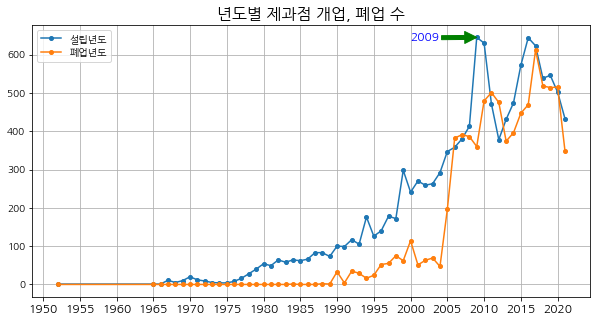

In [ ]:
# [4-25] 년도별 제과점 개업, 폐업에 대한 선 그래프 그리기
import koreanize_matplotlib

dataT = temp.iloc[:, 1:].T
dataT.plot.line(figsize=(10, 5), marker='o', markersize=4)
plt.xticks(range(1950, 2022, 5), fontsize=12)
plt.title('년도별 제과점 개업, 폐업 수', fontsize=16)
plt.annotate('2009', (2009, 645), (2000, 635),
             arrowprops={'color':'green'}, fontsize=12, color='blue')
plt.grid(True)
plt.show()

### 3-6.평균 영업기간 분석
- 파리바게뜨, 뚜레쥬르 및 그 외 제과점으로 분류
- 영업 중인 곳과 폐업한 곳의 평균 영업기간을 알아봅니다

특정 문자열이 포함된 행 가져오기
- Series.str.contains(문자열) : 문자열이 포함된 행은 True, 아니면 False인 Series 반환
- DataFrame.loc[조건, :] : 조건이 True인 행만 가져오기

In [ ]:
print(bread['사업장명'].to_list())

['파리바게뜨(역촌역점)', '파리바게뜨', '신라명과(역촌현대점)', '브르망', '케잌하우스밀레', '뚜레쥬르', '파리바게뜨(우림시장점)', '뚜레쥬르사가정역점', '몽블랑제(신내점)', '파리바게뜨', '파리바게뜨 용마산역점', '파리바게뜨 중화역점', '델리카리', '파리바게뜨 사가정점', '뚜레쥬르용마산역점', '빵나라', '케익하우스 쥬떼므', '던킨도너츠 먹골점', '파리바게뜨 면목역점', '빵이가득한집', '빵이가득한집', '파리바게뜨면목중앙점', '몽블랑제 면목점', '우림베이커리', '따끈따끈방이야기', '파리바게뜨종암점', '파리바게트', '상제리아베이커리', '투썸플레이스엔타워점', '외계인방앗간 문정점', '앨리스 베이커리 카페', '스위트 팔레트 케이크(sweet palette cake)', '그리리', '도담도담식빵 고덕점', '태극당 District C점', '유한회사 마미갸또금천', '리블리롱제과', '빚은 오금역점', '정수제빵소', '어썸 도넛 서울', '포레포레', '판이판 베이커리', '나폴레옹과자점', '홍미당', '브레드82(Bread82)', '밀포레이트', '브레댄코 신도림역점', '연재스토리즈', '서라당', '미미가미미(米米加味美)', '파리바게뜨(당산포스빌)', '몽쥬 빠티세리(Monge patisserie)', '뚜레쥬르 카페강남대로점', '모찌모찌브레드', '파리크라상 서울대병원점', '수고한 나에게', '르솔레이', '파이앤브라우니', '(주)신세계푸드 트레이더스월계점', '롤링핀 신대방삼거리역점', '프롬프랑(fromfranc)', '그럼,', '좋은 아침 pastry', '서울연인', '(주)파리크라상 파리바게뜨 은평성모병원점', '온베이커리', '153도씨', '브리오슈도레 종로타워점', '브리오슈도레 그랑서울점', '제이몬티', '뚜레쥬르 카페신촌점', '다음에또봐', '기프트(Gift)', '서울연인단팥빵', '슈가파티', '던킨 서울대병원점', '해피데이', '밀브레드(Mill Bread)',

In [ ]:
# bread에서 '사업장명' 컬럼을 사용하여
# '파리바게트', '파리바게뜨' 이름인 곳을 뽑아 paris로 이름 붙입니다.
paris = bread.loc[bread['사업장명'].str.contains('파리바게'), :]
paris.head(3)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동,2001,0,21.0
1,20030507,1,0,파리바게뜨,은평구,갈현동,2003,0,19.0
6,20060417,1,0,파리바게뜨(우림시장점),중랑구,망우동,2006,0,16.0


In [ ]:
#  bread에서 '사업장명' 컬럼을 사용하여
# '뚜레쥬르' 이름인 곳을 뽑아 tous로 이름 붙입니다.
tous = bread.loc[bread['사업장명'].str.contains('뚜레쥬르'), :]
tous.head(3)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
5,20050412,1,0,뚜레쥬르,중랑구,신내동,2005,0,17.0
7,20060822,1,0,뚜레쥬르사가정역점,중랑구,면목동,2006,0,16.0
14,20070416,1,0,뚜레쥬르용마산역점,중랑구,면목동,2007,0,15.0


In [ ]:
print(paris.shape, tous.shape)

(1059, 9) (586, 9)


In [ ]:
# 설립년도가 2000년 이후이면서 영업 중인 곳의 영업기간 정보
# paris, tous에 대해 각각 구해서 temp1, temp2로  명명
temp1 = paris.loc[(paris['설립년도']>=2000) & (paris['상태코드']==1), '영업기간']
temp2 = tous.loc[(tous['설립년도']>=2000) & (tous['상태코드']==1), '영업기간']

# temp1, temp2의 평균을 구해 이름을 comp로 하는 DataFrame으로 만듭니다.
# index => ['파리바게트', '뚜레쥬르'], columns => ['영업']
s = pd.Series([temp1.mean(), temp2.mean()], index=['파리바게트', '뚜레쥬르'])
comp = pd.DataFrame(s, columns=['영업'])
comp

,영업
파리바게트,12.357022
뚜레쥬르,9.796296


In [ ]:
# 설립년도 2000년 이후이면서 폐업한 곳의 영업기간 정보를 구합니다.
# paris, tous에 대해 각각 구해서 temp1, temp2로 이름 붙입니다.
temp1 = paris.loc[(paris['설립년도']>=2000) & (paris['상태코드']==2), '영업기간']
temp2 = tous.loc[(tous['설립년도']>=2000) & (tous['상태코드']==2), '영업기간']

# temp1, temp2의 평균을 구해 comp에 '폐업' 컬럼으로 추가합니다.
comp['폐업'] = [temp1.mean(), temp2.mean()]
comp

,영업,폐업
파리바게트,12.357022,7.712687
뚜레쥬르,9.796296,7.309028


In [ ]:
# 파리바게트, 뚜레쥬르가 아닌 다른 사업장에 대한 정보를 찾아 other로 이름 붙입니다.
condition1 = (bread['사업장명'].str.contains('파리바게'))
condition2 = (bread['사업장명'].str.contains('뚜레쥬르'))
other = bread.loc[~(condition1 | condition2), :]
# other의 행, 열 정보를 확인합니다.
other.shape

(10407, 9)

In [ ]:
bread.shape[0], paris.shape[0] + tous.shape[0] + other.shape[0]

(12052, 12052)

In [ ]:
comp

,영업,폐업
파리바게트,12.357022,7.712687
뚜레쥬르,9.796296,7.309028


In [ ]:
# other의 2000년 이후 설립된 곳의 영업, 폐업 사업장을 구한 뒤
# temp1, temp2 이름을 붙입니다.
temp1 = other.loc[(other['설립년도']>=2000) & (other['상태코드']==1), '영업기간']
temp2 = other.loc[(other['설립년도']>=2000) & (other['상태코드']==2), '영업기간']


# temp1, temp2의 영업기간 평균을 구해 comp 에 '나머지' 행으로 추가합니다.
temp = pd.DataFrame([[temp1.mean(), temp2.mean()]], index=['나머지'], columns=['영업', '폐업'])
comp = comp.append(temp)
comp

,영업,폐업
파리바게트,12.357022,7.712687
뚜레쥬르,9.796296,7.309028
나머지,6.332259,4.619193


### 구별 폐업비율 분석


In [ ]:
#  paris에서 폐업한 곳에 대해 '구명'별 개수를 구해
# temp에 '폐업'이라는 컬럼으로 추가하고,
# reset_index()를 사용하여 index를 columns로 사용되도록 한다. (temp2로 다시 저장)
temp['폐업'] = paris.loc[paris['상태코드']==2, '구명'].value_counts()
temp2 = temp.reset_index()
temp2.head(2)

,index,구명,폐업
0,강남구,59,28
1,송파구,49,20


DataFrame의 모든 컬럼이름 변경
- DataFrame.columns = [컬럼이름1, 컬럼이름2, ...]
- 기존 컬럼의 개수와 같아야 함

In [ ]:
# [4-34] temp2의 컬럼명을 ['구', '영업', '폐업']으로 변경한다
temp2.columns = ['구', '영업', '폐업']

# temp2의 첫 2개 행을 출력한다
temp2.head(2)

,구,영업,폐업
0,강남구,59,28
1,송파구,49,20


In [ ]:
#  temp2에 '폐업비율' 컬럼을 추가한다
# 폐업비율 = 폐업 / (폐업 + 영업) * 100
temp2['폐업비율'] = (temp2['폐업'] / (temp2['폐업'] + temp2['영업'])) * 100

# temp2의 첫 3개 행을 출력한다
temp2.head(3)

,구,영업,폐업,폐업비율
0,강남구,59,28,32.183908
1,송파구,49,20,28.985507
2,서초구,38,24,38.709677


In [ ]:
# [4-36] temp2를 폐업비율을 기준으로 오름차순 정렬하여 TOP5를 출력
# 폐업비율이 가장 작은 곳은 은평구, 동대문구 ... 등으로 정보를 찾게 됨
temp2.sort_values('폐업비율').head()

,구,영업,폐업,폐업비율
5,은평구,33,6,15.384615
12,동대문구,27,5,15.625000
17,도봉구,21,4,16.000000
8,구로구,30,10,25.000000
23,강북구,16,6,27.272727


In [ ]:
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
s.quantile([0, 0.5, 1])

0.0     1.0
0.5     5.5
1.0    10.0
dtype: float64

In [ ]:
temp2.shape[0] *0.3

7.5

In [ ]:
# temp2에서 폐업비율 하위 30%인 곳을 구하시오.
value = temp2['폐업비율'].quantile(0.3)
print(value)
temp2.loc[temp2['폐업비율'] <= value, ].sort_values('폐업비율')

29.042064333686817


,구,영업,폐업,폐업비율
5,은평구,33,6,15.384615
12,동대문구,27,5,15.625000
17,도봉구,21,4,16.000000
8,구로구,30,10,25.000000
23,강북구,16,6,27.272727
4,강서구,34,13,27.659574
13,성동구,26,10,27.777778
1,송파구,49,20,28.985507


In [ ]:
temp2.sort_values('폐업비율').head(8)

,구,영업,폐업,폐업비율
5,은평구,33,6,15.384615
12,동대문구,27,5,15.625000
17,도봉구,21,4,16.000000
8,구로구,30,10,25.000000
23,강북구,16,6,27.272727
4,강서구,34,13,27.659574
13,성동구,26,10,27.777778
1,송파구,49,20,28.985507


In [ ]:
25 * 0.2

5.0

In [ ]:
# temp2에서 폐업비율 상위 20%인 곳을 구하시오.
value = temp2['폐업비율'].quantile(0.8)
print(value)
temp2.loc[temp2['폐업비율'] >= value, ]

42.37726098191215


,구,영업,폐업,폐업비율
10,강동구,28,25,47.169811
18,용산구,20,16,44.444444
20,광진구,19,16,45.714286
21,금천구,17,14,45.161290
24,종로구,12,12,50.000000


### 시각화

In [ ]:
# 파리바게트의 구별 영업, 폐점장 수 구하기
paris = bread.loc[bread['사업장명'].str.contains('파리바게'), :]
data = pd.DataFrame()
data['영업'] = paris.loc[paris['상태코드']==1, '구명'].value_counts()
data['폐업'] = paris.loc[paris['상태코드']==2, '구명'].value_counts()
#data = data.sort_index()
data.head(5)

,영업,폐업
강남구,59,28
송파구,49,20
서초구,38,24
영등포구,37,22
강서구,34,13


In [ ]:
plt.text?  # x,y, s (텍스트)

In [ ]:
y = (data['폐업'] / (data['폐업'] + data['영업'])) * 100
y

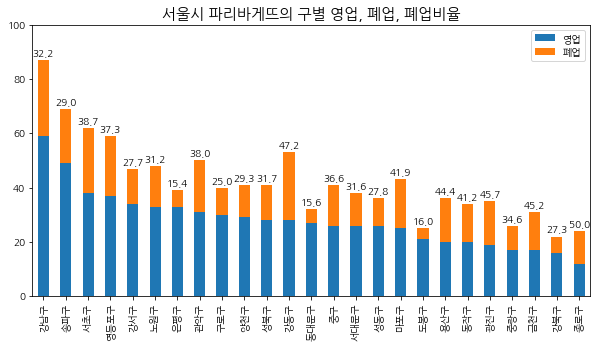

In [ ]:
# [4-40]  파리바게뜨의 영업/폐업 누적 bar 그래프 그리기
import koreanize_matplotlib

data.plot.bar(figsize=(10, 5), stacked=True)
y = round((data['폐업'] / (data['폐업'] + data['영업'])) * 100, 1)
pos = (data['영업'] + data['폐업']) + 1
for i in range(len(data)):
    plt.text(i, pos[i], y[i],
             fontsize=10, color='black',
             horizontalalignment='center',  # (left, center, right)
             verticalalignment='bottom')    # (top, center, bottom)
plt.title('서울시 파리바게뜨의 구별 영업, 폐업, 폐업비율', fontsize=15)
plt.ylim(0, 100)
plt.show()

In [ ]:
bread.head(2)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
1055,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동,2001,0,21
1056,20030507,1,0,파리바게뜨,은평구,갈현동,2003,0,19


In [ ]:
#  bread를 사용하여 은평구에서 영업 중인 동별 빵집 개수를 구해 봅니다.
condition1 = bread['구명']=='은평구'
condition2 = bread['상태코드']==1
#data = bread.loc[condition1 & condition2, :]
data = bread.loc[(bread['구명']=='은평구') & (bread['상태코드']==1), :]
s = data['동명'].value_counts()
s

진관동    30
응암동    24
대조동    20
불광동    17
신사동    17
역촌동    16
갈현동    15
녹번동    12
구산동    11
증산동     8
수색동     3
Name: 동명, dtype: int64

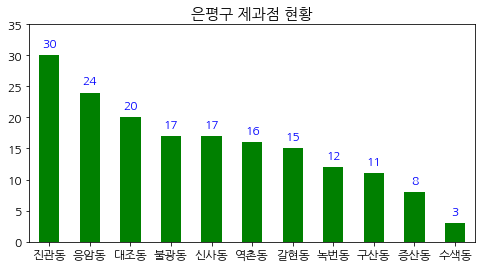

In [ ]:
# 위에서 구한 s를 사용해 은평구의 동별 빵집 개수를 그래프로 표시해 봅니다.
s.plot.bar(figsize=(8, 4), rot=0, color='green', fontsize=12)
plt.title('은평구 제과점 현황', fontsize=15)
plt.ylim(0, 35)
y = s.values
for i in range(len(s)):
    plt.text(i, y[i]+1, y[i],
             fontsize=12, color='blue',
             horizontalalignment='center',  # (left, center, right)
             verticalalignment='bottom')    # (top, center, bottom)
plt.show()

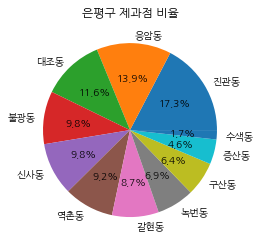

In [ ]:
#  은평구의 동별 빵집 비율을 원형 그래프로 표시해 봅니다.
s.plot.pie(label='', autopct='%.1f%%')
plt.title('은평구 제과점 비율')
plt.show()

In [ ]:
"파리바게뜨, 은평구 성공적!"